<a href="https://colab.research.google.com/github/duyanhphanduc/eCommerce-Events-History-in-Cosmetics-Shop/blob/main/eCommerce%20Events%20History%20in%20Cosmetics%20Shop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Read Data Function
#@markdown 1. open_sheets(spreadsheet_key, sheet_name,header)

def open_sheets(spreadsheet_key, sheet_name,header):
  body = header + 1
  wb = gc.open_by_key(spreadsheet_key)
  ws = wb.worksheet(sheet_name)
  rows = ws.get_all_values()

  content = pd.DataFrame.from_records(rows)
  header = content.iloc[header]
  body = content.iloc[body:]
  body.columns = header
  current_data = body.reset_index(drop=True)
  return current_data

def open_part_of_sheets(spreadsheet_key, sheet_name,header,list_range_input):
  body = header + 1
  wb = gc.open_by_key(spreadsheet_key)
  ws = wb.worksheet(sheet_name)
  rows = ws.batch_get(list_range_input)[0]

  content = pd.DataFrame.from_records(rows)
  header = content.iloc[header]
  body = content.iloc[body:]
  body.columns = header
  current_data = body.reset_index(drop=True)
  
  return current_data

#@markdown 2. write_data_to_sheet(spreadsheet_key, sheet_name, data_to_write)

def write_data_to_sheet(spreadsheet_key, sheet_name, data_to_write):
  wb = gc.open_by_key(spreadsheet_key)
  ws_his = wb.worksheet(sheet_name)
  set_with_dataframe(ws_his,data_to_write)

def write_part_of_data_to_sheet(spreadsheet_key, sheet_name, data_to_write,
                                range_to_write_on):
  wb = gc.open_by_key(spreadsheet_key)
  ws_his = wb.worksheet(sheet_name)

  data_to_write2 = [data_to_write.columns.to_list()] + data_to_write.values.tolist()
  ws_his.update(range_to_write_on, data_to_write2)


#@markdown 3. delete_sheet(spreadsheet_key, sheet_name)
def delete_sheet(spreadsheet_key, sheet_name):
  wb = gc.open_by_key(spreadsheet_key)
  worksheet = wb.worksheet(sheet_name)
  wb.del_worksheet(worksheet)

#@markdown 4. clear_sheet(spreadsheet_key, sheet_name)
def clear_sheet(spreadsheet_key, sheet_name):
  wb = gc.open_by_key(spreadsheet_key)
  worksheet = wb.worksheet(sheet_name) 
  worksheet.clear()

#@markdown 5. worksheets_name(spreadsheet_key)
def worksheets_name(spreadsheet_key):
  wb = gc.open_by_key(spreadsheet_key)
  sheet_name = [s.title for s in wb.worksheets()]
  return sheet_name


#@markdown 6. clear_part_of_sheet(spreadsheet_key, sheet_name,range)
def clear_part_of_sheet(spreadsheet_key, sheet_name,range):
  wb = gc.open_by_key(spreadsheet_key)
  wb.values_clear(sheet_name + '!'+range)


#@markdown 7. read_all_files(path)
def read_all_files(path):
  total_data = pd.DataFrame()
  file_list = os.listdir(path)
  for x in file_list:
    data = pd.read_csv(path + '//' + x)
    total_data= pd.concat([total_data,data])
  total_data = total_data.drop_duplicates()
  return total_data

def to_numeric_in_series(data, list_of_columns):
    for x in list_of_columns:
        print(x)
        data[x] = data[x].astype(str)
        data[x] = data[x].str.replace('\u202c','')
        data[x] = data[x].str.replace('đ','')
        data[x] = data[x].fillna(0).str.replace(',','').str.strip()
        data.loc[data[x]=='',x] =0

        cond_negative = data[x].astype(str).str.contains('-')
        if cond_negative.to_list().count(True) > 0:
            negative = data[cond_negative].copy()
            negative[x] = -1 * negative[x].str.replace('-','').astype(float)
            
            positive = data[~cond_negative].copy()
            positive[x] = positive[x].astype(float)
            data = pd.concat([negative, positive])
        else:
            data[x] = data[x].fillna(0)
            data[x] = data[x].astype(float)
    return data
  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/
import pandas as pd
from datetime import datetime

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


| Property |	Description |
| --- | --- |
| **view** | a user viewed a product |
| **cart** | a user added a product to shopping cart |
| **remove_from_cart** | a user removed a product from shopping cart |
| **purchase** | a user purchased a product |

In [ ]:
oct_df = pd.read_csv("2019-Oct.csv")
nov_df = pd.read_csv("2019-Nov.csv")
dec_df = pd.read_csv("2019-Dec.csv")
jan_df = pd.read_csv("2020-Jan.csv")
feb_df = pd.read_csv("2020-Feb.csv")

dataframe = [oct_df, nov_df, dec_df, jan_df, feb_df]
df = pd.concat(dataframe)

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [ ]:
df.shape

(20692840, 9)

In [ ]:
df.describe()

,product_id,category_id,price,user_id
count,2.069284e+07,2.069284e+07,2.069284e+07,2.069284e+07
mean,5.484297e+06,1.554230e+18,8.534735e+00,5.215527e+08
std,1.305716e+06,1.691038e+17,1.938142e+01,8.744312e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,4.654960e+05
25%,5.724650e+06,1.487580e+18,2.060000e+00,4.818306e+08
50%,5.810720e+06,1.487580e+18,4.050000e+00,5.531297e+08
75%,5.857864e+06,1.487580e+18,7.060000e+00,5.788573e+08
max,5.932595e+06,2.242903e+18,3.277800e+02,6.220902e+08


# 1/ What is the most frequent product/ categories in the cosmetics online store?

In [ ]:
nb_solds = df[df['event_type'] == 'purchase']

In [ ]:
revene_per_product = nb_solds.groupby('product_id').agg(product_count=("product_id", "count")).sort_values("product_count", ascending = False)
revene_per_product.head()

,product_count
product_id,
5809910,7549
5854897,4631
5700037,3684
5802432,3533
5751422,3521


## So the top 5 most purchased products from 11/2019 - 2/2020 are:

       Product_id | Goods_sold
     1.   5809910 | 7549
     2.   5854897 | 4631
     3.   5700037 | 3684
     4.   5802432 | 3533
     5.   5751422 | 3521

In [ ]:
revene_per_category = nb_solds.groupby('category_id').agg(category_count=("category_id", "count")).sort_values("category_count", ascending = False)
revene_per_category.head()

,category_count
category_id,
1487580007675986893,80137
1487580006317032337,50555
1487580005092295511,44870
1487580005595612013,44334
1487580005671109489,43452


## And the top 5 most purchased category from 11/2019 - 2/2020 are:

                  Category_id |	Goods_sold
     1.   1487580007675986893 |	80137
     2.   1487580006317032337 |	50555
     3.   1487580005092295511 |	44870
     4.   1487580005595612013 |	44334
     5.   1487580005671109489 |	43452

# 2. What is the average price of a product in the cosmetics online store?

In [ ]:
average_price_per_store = nb_solds.groupby('brand').agg(avg_price=("price", "mean")).sort_values("brand")
avg_price_of_a_cosmetics_product = average_price_per_store.mean()
avg_price_of_a_cosmetics_product

avg_price    13.63599
dtype: float64

It's about $13.64

# 3. What are the most popular brands in the cosmetics online store?

In [ ]:
user_id_count_per_brand = df.groupby('brand').agg(user_id_count=("user_id", "count")).sort_values("user_id_count", ascending = False)
user_id_count_per_brand.head()

,user_id_count
brand,
runail,1528908
irisk,1033852
masura,861763
grattol,852591
bpw.style,434813


## And the top 5 most popular brands in the cosmetics online stor from 11/2019 - 2/2020 are:

          Brand     |	User_Id_Count
     1.   runail    |	1528908
     2.   irisk     |	1033852
     3.   masura    |	861763
     4.   grattol   |	852591
     5.   bpw.style |	434813

# 4. How often do users add items to their shopping cart but not complete a purchase?

There are 3 types of event after people view and decide to cart a product
1.   Leave them inside the cart (standby_incart) (not include in the dataset. So we would have to calculate it)
2.   Remove them from cart (remove)
3.   Buy them (carted_buy)

So "add items to their shopping cart but not complete a purchase" = Leave them inside the cart (standby_incart) + Remove them from cart (remove)

Leave them inside the cart (standby_incart) = Total in cart - Remove them from cart (remove) - Buy them (carted_buy)

Combine the 2 "formulas", we will have:
"add items to their shopping cart but not complete a purchase" = Total in cart - Buy them (carted_buy).

In [ ]:
total_carted = df[df['event_type'] == 'cart'].agg(count = ("user_id","count"))
nb_removed = df[df['event_type'] == 'remove_from_cart'].agg(count = ("user_id","count"))
nb_carted_buy =  df[df['event_type'] == 'purchase'].agg(count = ("user_id","count"))
nb_standby_incart = total_carted - nb_carted_buy
proportion = nb_standby_incart/ total_carted *100

,user_id
count,77.688407


So the users will have a 77.69% to put items in their shopping but won't complete a purchase. Yikes!!!!

# 5. What is the conversion rate from cart to purchase?

Conversion rate = (Number of purchases / Number of carts) * 100

In [ ]:
conversion_rate = nb_carted_buy/total_carted *100
conversion_rate

,user_id
count,22.311593


But I don't know why 22.31% of conversion rate sounds like a really good number!! Haha!@!

# 6. What time do users usually on the cosmetics online store?

In [ ]:
views = df[df['event_type'] == 'view']
a = views['event_time']
b = pd.to_datetime(a)
hour = b.dt.hour
views['hour'] = hour


<ipython-input-16-0547ba73f5ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  views['hour'] = hour


In [ ]:
hours_count = views.groupby('hour').agg(count = ("user_id", "count"))
hours_count

,count
hour,
0,89823
1,76937
2,84941
3,122096
4,181733
5,273928
6,377012
7,455206
8,502937


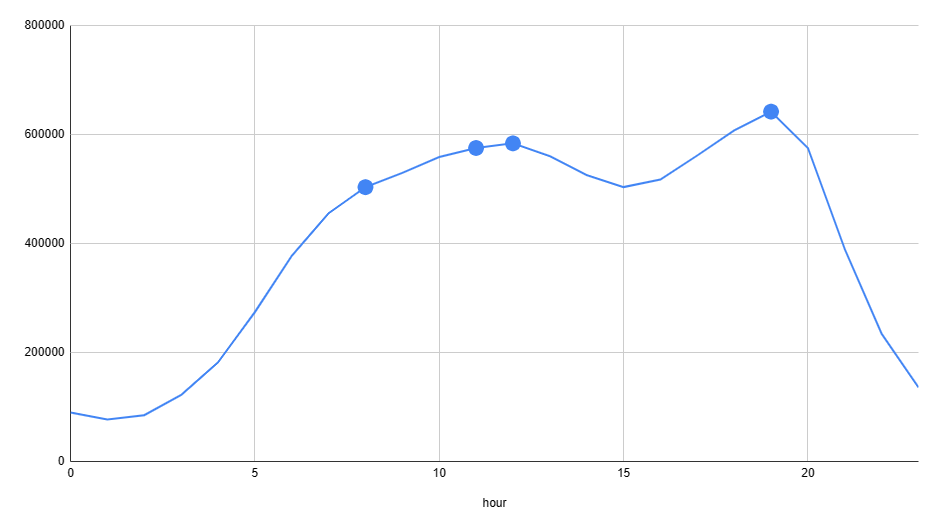

According to the graph we made by Spreadsheet, we can see that the time between we always have people viewing our online business.

Our users visit our business online at 20h most frequent, then come secondly are 11h and 12h, thirdly at 7h.

Cool ~~!!


# 7. What is the distribution of user sessions across different days of the week?

In [ ]:
date = b.dt.date
views['date'] = date
views['day_of_week'] = views['date'].apply(lambda x: x.strftime('%A'))
dow_count = views['day_of_week'].value_counts()
dow_count

<ipython-input-17-26390af73ade>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  views['date'] = date
<ipython-input-17-26390af73ade>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  views['day_of_week'] = views['date'].apply(lambda x: x.strftime('%A'))


Thursday     1453974
Wednesday    1449201
Tuesday      1421345
Monday       1410879
Friday       1377729
Sunday       1287327
Saturday     1257366
Name: day_of_week, dtype: int64

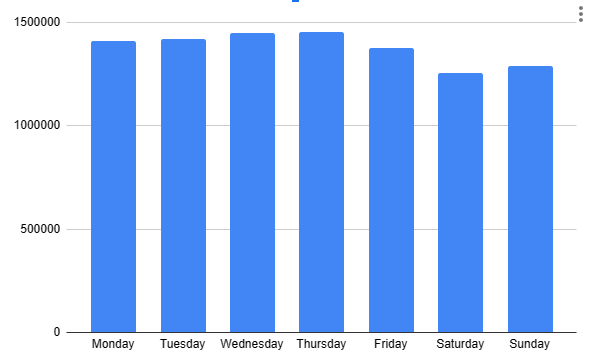

As we can see on our graph from Sreadsheets, the peak day of week is Thurdays.

Second, Wednesdays.

Then, Tuesdays and Monday.

Others, would stay below 1400000.